In [91]:
import pandas as pd
import pickle
from wordcloud import WordCloud, STOPWORDS
from wordcloud import get_single_color_func,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # if you don't have it, you'll need to install it

In [12]:
! pip3 install stylecloud

     |████████████████████████████████| 262 kB 123 kB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement icon-font-to-png (from stylecloud) (from versions: none)
ERROR: No matching distribution found for icon-font-to-png (from stylecloud)


In [4]:
mendesArmyDF = pd.read_pickle('mendesArmyDF.pkl')

# Attempt Number One

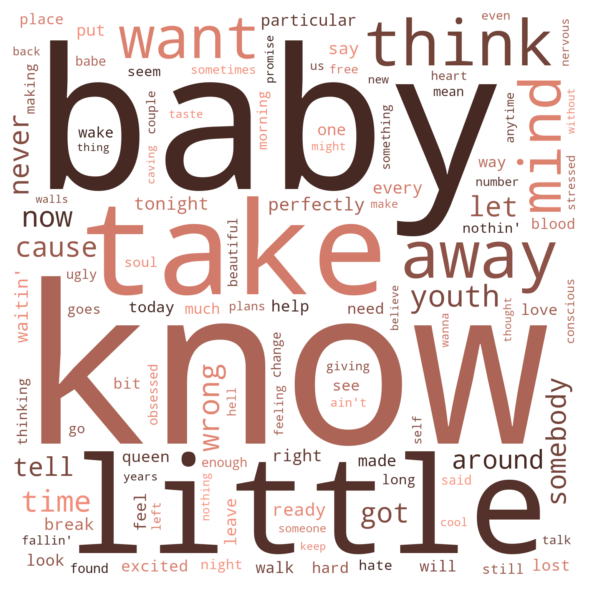

In [86]:
allWords = ""
for i, txt in enumerate(mendesArmyDF.Lyrics):
    allWords += txt
allWords = allWords.lower()
stopWords = set(STOPWORDS)
stopWords = stopWords.union(["yeah", "Oh"])
stopWords = STOPWORDS.union({'ooh', 'm', 'mine', 's', 'ah', 'ya', 'hi', 'hey', 'mhm', 'hmm', 'nah', 'uh', 'oh'
                           , 'don', 't', 'kanye', 'uhh', 'tastei', 'youi', 'youhere', 'awayit', 'mei', 'yeah'})
wordcloud = WordCloud(font_path=None, width=1500, height=1500, 
 margin=30, prefer_horizontal=0.9, min_font_size=24, stopwords=stopWords, 
 background_color='white', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0.4, 
 regexp=None, collocations=False, colormap="Greens", min_word_length=0).generate(allWords)



plt.figure(figsize = (8, 8), facecolor = None)
#plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func=get_single_color_func('#95574B')), interpolation ='bilinear') # Using the color function here
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Attempt Number Two

In [128]:
mendes_mask = np.array(Image.open("./guitar.jpeg"))
mendes_mask.shape
image_colors = ImageColorGenerator(mendes_mask)

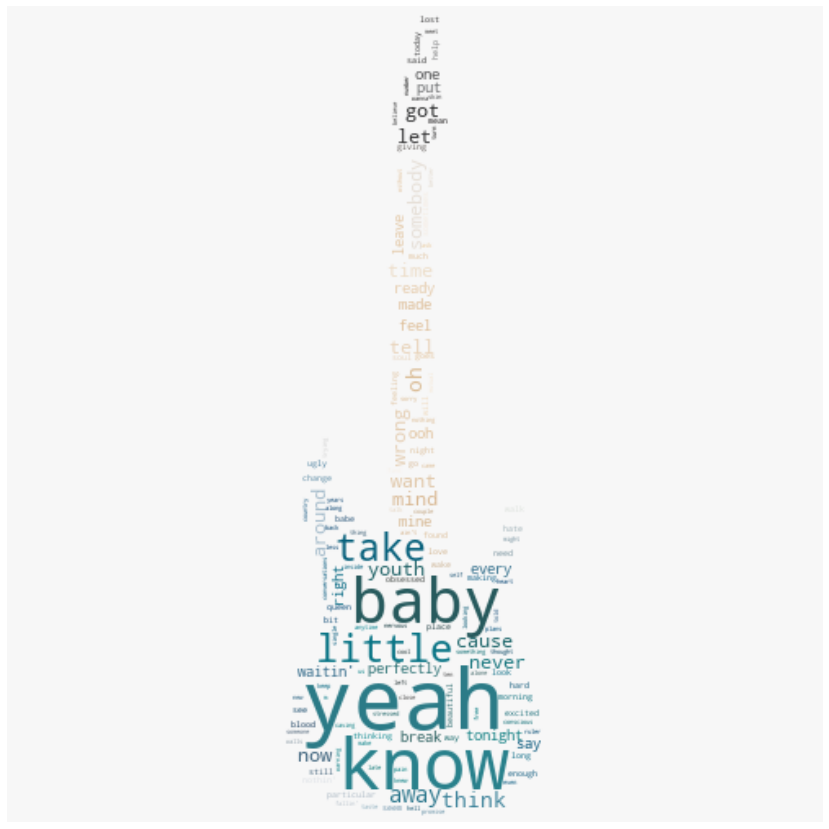

In [129]:
allWords = ""
for i, txt in enumerate(mendesArmyDF.Lyrics):
    allWords += txt
allWords = allWords.lower()
stopWords = set(STOPWORDS)
stopWords = stopWords.union(["yeah", "Oh"])
stopWords = STOPWORDS.union({'ooh', 'm', 'mine', 's', 'ah', 'ya', 'hi', 'hey', 'mhm', 'hmm', 'nah', 'uh', 'oh'
                           , 'don', 't', 'kanye', 'uhh', 'tastei', 'youi', 'youhere', 'awayit', 'mei', 'yeah'})
# Create a word cloud image
wc_2 = WordCloud(collocations=False,background_color="#F7F7F7", mask = mendes_mask, width = 1600, height = 1600).generate(allWords)

# Generating colors from image
image_colors = ImageColorGenerator(mendes_mask)

# show
plt.figure(figsize=[20,15]) # height, width in inches
plt.imshow(wc_2.recolor(color_func=image_colors), interpolation ='bilinear') # Using the color function here
plt.axis("off")
plt.show()